In [65]:
### Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
### Inspecting the data to see what kind of insights there are to be found

obs = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

print(obs.head())
print(obs.info())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


- The observations are great, because none of the rows or cells are empty. The number of observations is what stands out and we can see which species are most sighted depending on park/generally.

In [6]:
print(species.head())
print(species.info())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      

- Because the species data frame includes the scientific name of the animals, both data frames can be joined for further analysis.

In [11]:
### Merging both data frames allows us to have more robust data so that we can see 
### which animals are observed most overall, not only by park.

df = pd.merge(left=species, right=obs)

In [9]:
print(df.head())
print(df.info())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0                 NaN                  Bryce National Park           130  
1                 NaN            Yellowstone National Park           270  
2                 NaN  Great Smoky Mountains National Park            98  
3                 NaN               Yosemite National Park           117  
4                 NaN               Yosemite National Park           128  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column    

Scoping the project:
- Which park gets the most observations?
- Which animal has been observed the most times?
- Which animals are observed most sorted by each park?
- Which park has the most endangered animals


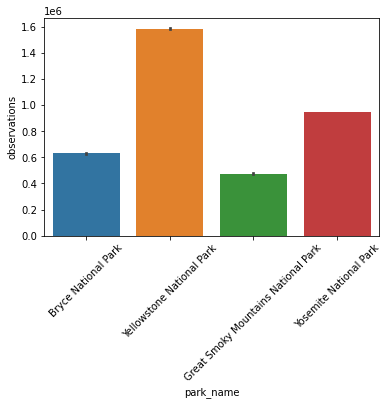

In [72]:
sns.barplot(data=df, y='observations', x='park_name', estimator=sum)
plt.xticks(rotation=45)
plt.show()

- Yellowstone has the most observations, but what animal in each park is most observed?
- Which endangered animals are most observed?

In [166]:
### Creating variables to get to the max observations of animal per park

yellowstone = df[df.park_name == "Yellowstone National Park"]
yellowstone_animal = yellowstone[yellowstone.category != 'Vascular Plant']
yellowstone_animal = yellowstone_animal[yellowstone_animal.category != 'Nonvascular Plant']
yellowstone_animal = yellowstone_animal.sort_values(by='observations', ascending=False).head(1)
#print(yellowstone_animal)

yosemite = df[df.park_name == "Yosemite National Park"]
yosemite_animal = yosemite[yosemite.category != 'Vascular Plant']
yosemite_animal = yosemite_animal[yosemite_animal.category != 'Nonvascular Plant']
yosemite_animal = yosemite_animal.sort_values(by='observations', ascending=False).head(1)
#print(yosemite_animal)

bryce = df[df.park_name == "Bryce National Park"]
bryce_animal = bryce[bryce.category != 'Vascular Plant']
bryce_animal = bryce_animal[bryce_animal.category != 'Nonvascular Plant']
bryce_animal = bryce_animal.sort_values(by='observations', ascending=False).head(1)
print(bryce_animal)

mountains = df[df.park_name == "Great Smoky Mountains National Park"]
mountains_animal = mountains[mountains.category != 'Vascular Plant']
mountains_animal = mountains_animal[mountains_animal.category != 'Nonvascular Plant']
mountains_animal = mountains_animal.sort_values(by='observations', ascending=False).head(1)
print(mountains_animal)


      category   scientific_name common_names conservation_status  \
15198   Mammal  Martes americana  Pine Marten                 NaN   

                 park_name  observations  
15198  Bryce National Park           167  
      category    scientific_name    common_names conservation_status  \
15542     Bird  Branta hutchinsii  Cackling Goose                 NaN   

                                 park_name  observations  
15542  Great Smoky Mountains National Park           139  


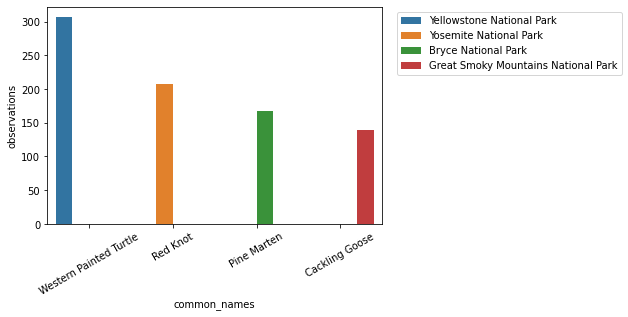

In [183]:
### Plotting the animals with most observations per park

animals = pd.concat([yellowstone_animal, yosemite_animal, bryce_animal, mountains_animal], axis=0)
sns.barplot(data=animals, x='common_names', y='observations', hue='park_name')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor= (1.03, 1))
plt.show()


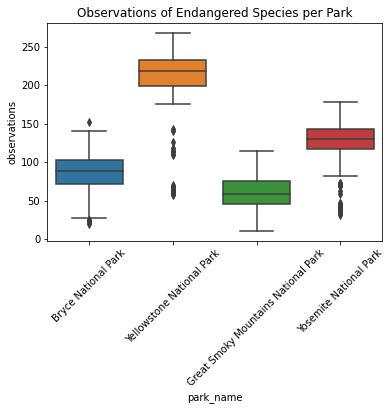

In [200]:
### Finding the endangered species and their observations. First we have to take away the rows with null values

endangered = df[df.conservation_status.notnull()]

sns.boxplot(data=endangered, x='park_name', y='observations')
plt.xticks(rotation=45)
plt.title("Observations of Endangered Species per Park")
plt.show()

